In [15]:
import numpy as np

import matplotlib.pylab as plt

%matplotlib inline

In [5]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [6]:
AND(1,1)

1

In [7]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [8]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [9]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    return AND(s1, s2)

In [17]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

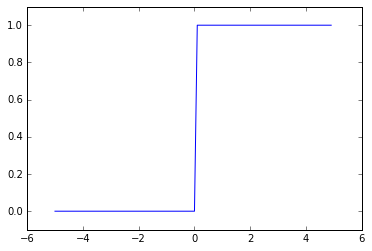

In [18]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

In [19]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

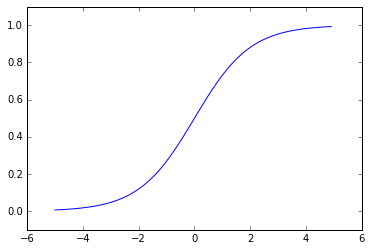

In [20]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

In [24]:
def relu(x):
    return np.maximum(0,x)

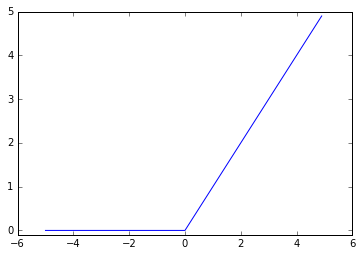

In [26]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-0.1, 5)
plt.show()

## 3.4.2 各層における信号伝達の実装

In [27]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [28]:
A1 = np.dot(X, W1) + B1

In [29]:
Z1 = sigmoid(A1)

In [30]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [38]:
def identity_function(x):
    return x

## 3.4.3 実装のまとめ

In [39]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2,0.4,0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2,0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2,0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network
    

In [40]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y 

In [41]:
network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

[ 0.31682708  0.69627909]


## 3.5.1 恒等関数とソフトマックス関数

In [42]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[  1.34985881  18.17414537  54.59815003]


In [43]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542102


In [45]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a